# Лабораторная работа №8 по курсу "Численные методы"
## Тема ЛР - "Двумерные начально-краевые задачи для дифференциального уравнения параболического типа"

Студент - Письменский Данила Владимирович

Группа - М8О-406Б-19

## Задание

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением *U(x, y, t)*.

### Вариант 1

$\large\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2} + a\frac{\partial^2 u}{\partial y^2}, ~~~a > 0$  
$u(0, y, t) = cos(\mu_2y)exp(-(\mu_1^2+\mu_2^2)at)$  
$u(\pi, y, t) = (-1)^{\mu_1}cos(\mu_2y)exp(-(\mu_1^2+\mu_2^2)at)$  
$u(x, 0, t) = cos(\mu_1x)exp(-(\mu_1^2+\mu_2^2)at)$  
$u(x, \pi, t) = (-1)^{\mu_2}cos(\mu_1x)exp(-(\mu_1^2+\mu_2^2)at)$  
$u(x, y, 0) = cos(\mu_1x)cos(\mu_2y)$  
Аналитическое решение: $U(x, y, t) = cos(\mu_1x)cos(\mu_2y)exp(-(\mu_1^2+\mu_2^2)at)$

In [1]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt

###  Константы

In [2]:
x_start = 0
x_end = np.pi

y_start = 0
y_end = np.pi

t_start = 0
t_end = 1

a = 1
mu1 = 2
mu2 = 1

h_x = 0.01
h_y = 0.01
tau = 0.01

### Начальные условия

In [3]:
# граничные условия
def phi_0(y, t, a, mu1, mu2):
    return np.cos(mu2 * y) * np.exp(-(mu1**2 + mu2**2) * a * t)

def phi_1(y, t, a, mu1, mu2):
    return (-1)**mu1 * np.cos(mu2 * y) * np.exp(-(mu1**2 + mu2**2) * a * t)

def phi_2(x, t, a, mu1, mu2):
    return np.cos(mu1 * x) * np.exp(-(mu1**2 + mu2**2) * a * t)

def phi_3(x, t, a, mu1, mu2):
    return (-1)**mu2 * np.cos(mu1*x) * np.exp(-(mu1**2 + mu2**2) * a * t)

def psi(x, y, mu1, mu2):
    return np.cos(mu1 * x) * np.cos(mu2 * y)

def exact_sol(x, y, t, a, mu1, mu2):
    return np.cos(mu1 * x) * np.cos(mu2 * y) * np.exp(-(mu1**2 + mu2 ** 2) * a * t)

## Аналитическое решение

Найдем аналитическое решение двумерной начально-краевой задачи для дифференциального уравнения параболического типа, затем будем сравнивать его с численными методами для того. Это нам пригодится, чтобы визуализировать зависимость максимального модуля ошибки от координаты y. Для этого реализовал функцию, которая возвращает матрицу U со значениями функции для аналитического решения.

In [4]:
def analytical_solve(x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau):
    x = np.arange(x_start, x_end, h_x)
    y = np.arange(y_start, y_end, h_y)
    t = np.arange(t_start, t_end, tau)

    U = np.zeros((len(t), len(x), len(y)))
    for i_x in range(len(x)):
        for i_y in range(len(y)):
            for i_t in range(len(t)):
                U[i_t][i_x][i_y] = exact_sol(x[i_x], y[i_y], t[i_t], a, mu1, mu2)
    
    return U

In [5]:
anal_solution = analytical_solve(x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau)

In [6]:
anal_solution.shape

(100, 315, 315)

### Погрешность
В качестве погрешности буду использовать максимальный модуль ошибки.

In [7]:
def max_abs_error(U_num, U_anal):
    return abs(U_num - U_anal).max()

### Реализация функций построения графиков
Для того, чтобы визуализировать решение ДУ численными методами, реализую функцию построения проекции плоскости на ось *x* в заданнй момент временеи *t* при заданной координате *y*.

In [17]:
def build_numerical_results_graphic(solution, method_name, time, coord_y, x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau):
    x = np.arange(x_start, x_end, h_x)
    y = np.arange(y_start, y_end, h_y)
    t = np.arange(t_start, t_end, tau)
    cur_y_id = abs(y - coord_y).argmin()
    cur_t_id = abs(t - time).argmin()
    
    plt.figure(figsize=(15, 9))
    plt.plot(x, anal_solution[cur_t_id][:, cur_y_id], label='Аналитическое решение')
    plt.plot(x, solution[cur_t_id][:, cur_y_id], label=method_name, color='r')
    
    plt.xlabel('x')
    plt.ylabel('U(x)')
    plt.legend()
    plt.grid()
    plt.show()

Чтобы проверить, наскольно точно решение ДУ численными методами, необходимо реализовать функцию построения графика зависимости погрешности (максимального модуля ошибки) от времени.

In [21]:
def build_errors_graphic(solution, method_name, t_start, t_end, tau):
    t = np.arange(t_start, t_end, tau)

    plt.figure(figsize=(15, 9))
    max_abs_errors = np.array([max_abs_error(solution[i], anal_solution[i]) for i in range(len(t))])
    plt.plot(t, max_abs_errors, label=method_name, color='g')

    plt.xlabel('t')
    plt.ylabel('Максимальный модуль ошибки')

    plt.legend()
    plt.grid()
    plt.show()

## Численные методы

### Метод переменных направлений

В двумерном случае схема метода переменных направлений имеет вид:
#### Подсхема 1 (1-ый шаг).

$\large {u^{k+{1 \over 2}}_{ij} - u^k_{ij} \over {\tau \ / \ 2}} = $
$\large{a \over {h^2_1}} (u^{k + {1 \over 2}}_{i+1j} - 2u^{k + {1 \over 2}}_{ij} + u^{k + {1 \over 2}}_{i-1j}) +$
$\large{a \over {h^2_2}} (u^k_{ij+1} - 2u^k_{ij} + u^k_{ij-1})$


#### Подсхема 1 (2-ой шаг)

$\large {u^{k+1}_{ij} - u^{k+{1 \over 2}}_{ij} \over {\tau \ / \ 2}} = $
$\large{a \over {h^2_1}} (u^{k + {1 \over 2}}_{i+1j} - 2u^{k + {1 \over 2}}_{ij} + u^{k + {1 \over 2}}_{i-1j}) +$
$\large{a \over {h^2_2}} (u^{k+1}_{ij+1} - 2u^{k+1}_{ij} + u^{k+1}_{ij-1})$


### Метод прогонки
Будем решать системы уравнений методом прогонки

In [10]:
def run_through_method(A, b):
    n = len(A)
    
    v = [0 for _ in range(n)]
    u = [0 for _ in range(n)]
    v[0] = A[0][1] / -A[0][0]
    u[0] = b[0] / A[0][0]
    for i in range(1, n - 1):
        v[i] = A[i][i + 1] / (-A[i][i] - A[i][i - 1] * v[i - 1])
        u[i] = (A[i][i - 1] * u[i - 1] - b[i]) / (-A[i][i] - A[i][i - 1] * v[i - 1])
    v[n - 1] = 0
    u[n - 1] = (A[n - 1][n - 2] * u[n - 2] - b[n - 1]) / (-A[n - 1][n - 1] - A[n - 1][n - 2] * v[n - 2])

    x = [0 for _ in range(n)]
    x[n - 1] = u[n - 1]
    for i in range(n - 1, 0, -1):
        x[i - 1] = v[i - 1] * x[i] + u[i - 1]
    return np.array(x)

In [44]:
def variable_directions_method(x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau, a, mu1, mu2, phi_0, phi_1, phi_2, phi_3, psi):
    x = np.arange(x_start, x_end, h_x)
    y = np.arange(y_start, y_end, h_y)
    t = np.arange(t_start, t_end, tau)
    U = np.zeros((len(t), len(x), len(y)))

    # начальное условие
    for x_i in range(len(x)):
        for y_i in range(len(y)):
            U[0][x_i][y_i] = psi(x[x_i], y[y_i], mu1, mu2)
    
    for t_i in range(1, len(t)):
        U_ht = np.zeros((len(x), len(y)))
        
        # Граничные условия
        for x_i in range(len(x)):
            U[t_i][x_i][0] = phi_2(x[x_i], t[t_i], a, mu1, mu2)
            U[t_i][x_i][-1] = phi_3(x[x_i], t[t_i], a, mu1, mu2)
            U_ht[x_i][0] = phi_2(x[x_i], t[t_i] - tau / 2, a, mu1, mu2)
            U_ht[x_i][-1] = phi_3(x[x_i], t[t_i] - tau / 2, a, mu1, mu2)
        
        for y_i in range(len(y)):
            U[t_i][0][y_i] = phi_0(y[y_i], t[t_i], a, mu1, mu2)
            U[t_i][-1][y_i] = phi_1(y[y_i], t[t_i], a, mu1, mu2)
            U_ht[0][y_i] = phi_0(y[y_i], t[t_i] - tau / 2, a, mu1, mu2)
            U_ht[-1][y_i] = phi_1(y[y_i], t[t_i] - tau / 2, a, mu1, mu2)
        
        # Решаем систему 1 (1-ый шаг метода)
        for y_i in range(1, len(y) - 1):
            A = np.zeros((len(x) - 2, len(x) - 2))
            b = np.zeros((len(x) - 2))

            A[0][0] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2
            A[0][1] = -a * tau * h_y**2
            for i in range(1, len(A) - 1):
                A[i][i - 1] = -a * tau * h_y**2
                A[i][i] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2
                A[i][i + 1] = -a * tau * h_y**2
            A[-1][-2] = -a * tau * h_y**2
            A[-1][-1] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2

            for x_i in range(1, len(x) - 1):
                b[x_i - 1] = U[t_i - 1][x_i][y_i - 1] * a * tau * h_x**2 + U[t_i - 1][x_i][y_i] * (2 * h_x**2 * h_y**2 - 2 * a * tau * h_x**2) + U[t_i - 1][x_i][y_i + 1] * a * tau * h_x**2
            b[0] -= (-a * tau * h_y**2) * phi_0(y[y_i], t[t_i] - tau / 2, a, mu1, mu2)
            b[-1] -= (-a * tau * h_y**2) * phi_1(y[y_i], t[t_i] - tau / 2, a, mu1, mu2)
            U_ht[1:-1, y_i] = np.array(run_through_method(A, b))
        
        # Решаем систему 2 (2-ой шаг метода)
        for x_i in range(1, len(x) - 1):
            A = np.zeros((len(y) - 2, len(y) - 2))
            b = np.zeros((len(y) - 2))

            A[0][0] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2
            A[0][1] = -a * tau * h_x**2
            for i in range(1, len(A) - 1):
                A[i][i - 1] = -a * tau * h_x**2
                A[i][i] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2
                A[i][i + 1] = -a * tau * h_x**2
            A[-1][-2] = -a * tau * h_x**2
            A[-1][-1] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2

            for y_i in range(1, len(y) - 1):
                b[y_i - 1] = U_ht[x_i - 1][y_i] * a * tau * h_y**2 + U_ht[x_i][y_i] * (2 * h_x**2 * h_y**2 - 2 * a * tau * h_y**2) + U_ht[x_i + 1][y_i] * a * tau * h_y**2
                
            b[0] -= (-a * tau * h_x**2) * phi_2(x[x_i], t[t_i], a, mu1, mu2)
            b[-1] -= (-a * tau * h_x**2) * phi_3(x[x_i], t[t_i], a, mu1, mu2)
            U[t_i][x_i][1:-1] = run_through_method(A, b)
    return U

In [12]:
variable_directions_solution = variable_directions_method(x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau, a, mu1, mu2, phi_0, phi_1, phi_2, phi_3, psi)

In [13]:
variable_directions_solution.shape

(100, 315, 315)

### Максимальный модуль ошибки для метода переменных направлений

In [14]:
print(f'Максимальный модуль ошибки для метода переменных направлений = {max_abs_error(variable_directions_solution, anal_solution)}')

Максимальный модуль ошибки для метода переменных направлений = 0.0002980949702586777


### Визуализация решения ДУ с помощью метода переменных направлений

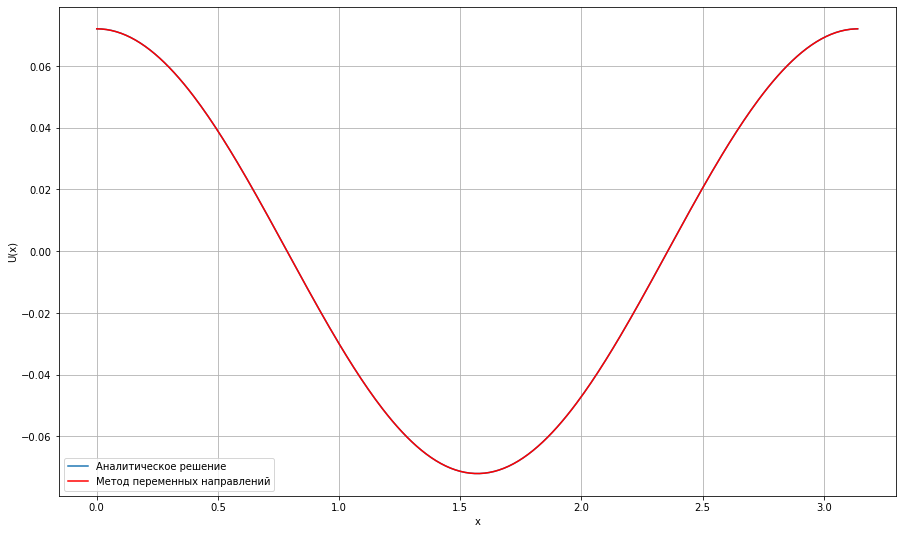

In [19]:
build_numerical_results_graphic(variable_directions_solution, "Метод переменных направлений", 0.5, 0.5, x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau)

### Визуализация погрешности метода переменных направлений

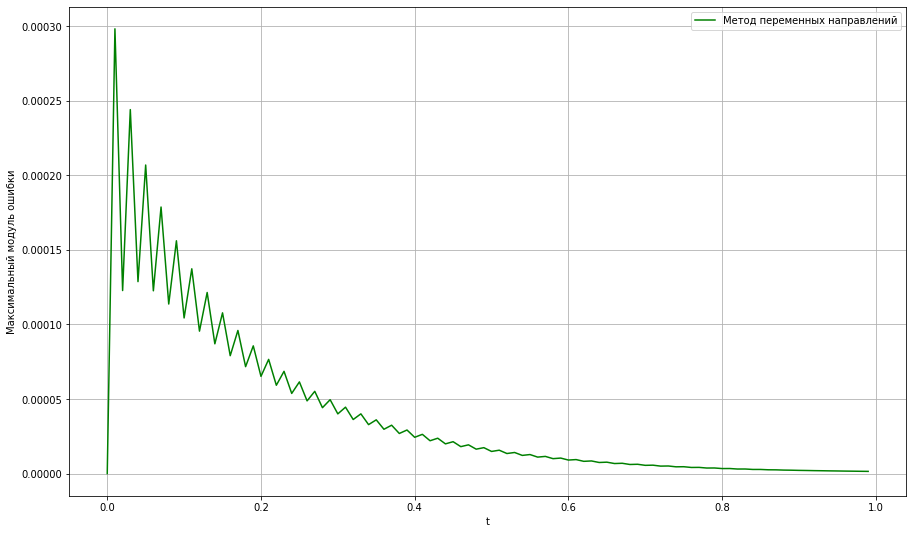

In [22]:
build_errors_graphic(variable_directions_solution, "Метод переменных направлений", t_start, t_end, tau)

К достоинствам метода переменных направлений можно отнести высокую точность, поскольку метод имеет второй порядок точности по времени. К недостаткам можно отнести условную устойчивость при числе пространственных переменных больше двух. Кроме этого, МПН условно устойчив взадачах со смешанными производными уже в двумерном случае. 

### Метод дробных шагов

Метод дробных шагов использует только неявные схемы, что делает его абсолютно устойчивым в задачах, не содержащих смешанные производные.

#### Подсхема 1 (1-ый шаг). 

$\large {u^{k+{1 \over 2}}_{ij} - u^k_{ij} \over {\tau}} = $
$\large{a \over {h^2_1}} (u^{k + {1 \over 2}}_{i+1j} - 2u^{k + {1 \over 2}}_{ij} + u^{k + {1 \over 2}}_{i-1j})$

#### Подсхема  2 (2-ой шаг).

$\large {u^{k+1}_{ij} - u^{k+{1 \over 2}}_{ij} \over {\tau}} = $
$\large{a \over {h^2_2}} (u^{k+1}_{ij+1} - 2u^{k+1}_{ij} + u^{k+1}_{ij-1})$  

Схема МДШ имеет порядок $O(\tau + |h|^2)$, т.е. первый порядок по времени и второй по переменным *x* и *y*.

In [28]:
def fractional_steps_method(x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau, a, mu1, mu2, phi_0, phi_1, phi_2, phi_3, psi):
    x = np.arange(x_start, x_end, h_x)
    y = np.arange(y_start, y_end, h_y)
    t = np.arange(t_start, t_end, tau)
    U = np.zeros((len(t), len(x), len(y)))

    # начальное условие
    for x_i in range(len(x)):
        for y_i in range(len(y)):
            U[0][x_i][y_i] = psi(x[x_i], y[y_i], mu1, mu2)
    
    for t_i in range(1, len(t)):
        U_ht = np.zeros((len(x), len(y)))
        
        # граничные условия
        for x_i in range(len(x)):
            U[t_i][x_i][0] = phi_2(x[x_i], t[t_i], a, mu1, mu2)
            U[t_i][x_i][-1] = phi_3(x[x_i], t[t_i], a, mu1, mu2)
            U_ht[x_i][0] = phi_2(x[x_i], t[t_i] - tau / 2, a, mu1, mu2)
            U_ht[x_i][-1] = phi_3(x[x_i], t[t_i] - tau / 2, a, mu1, mu2)
        
        for y_i in range(len(y)):
            U[t_i][0][y_i] = phi_0(y[y_i], t[t_i], a, mu1, mu2)
            U[t_i][-1][y_i] = phi_1(y[y_i], t[t_i], a, mu1, mu2)
            U_ht[0][y_i] = phi_0(y[y_i], t[t_i] - tau / 2, a, mu1, mu2)
            U_ht[-1][y_i] = phi_1(y[y_i], t[t_i] - tau / 2, a, mu1, mu2)
        
        # Решаем систему 1 (1-ый шаг метода)
        for y_i in range(1, len(y) - 1):
            A = np.zeros((len(x) - 2, len(x) - 2))
            b = np.zeros((len(x) - 2))

            A[0][0] = h_x**2 + 2 * a * tau
            A[0][1] = -a * tau
            for i in range(1, len(A) - 1):
                A[i][i - 1] = -a * tau
                A[i][i] = h_x**2 + 2 * a * tau
                A[i][i + 1] = -a * tau
            A[-1][-2] = -a * tau
            A[-1][-1] = h_x**2 + 2 * a * tau

            for x_i in range(1, len(x) - 1):
                b[x_i - 1] = U[t_i - 1][x_i][y_i] * h_x**2
            b[0] -= (-a * tau) * phi_0(y[y_i], t[t_i] - tau / 2, a, mu1, mu2)
            b[-1] -= (-a * tau) * phi_1(y[y_i], t[t_i] - tau / 2, a, mu1, mu2)
            U_ht[1:-1, y_i] = np.array(run_through_method(A, b))
        
        # Решаем систему 2 (2-ой шаг метода)
        for x_i in range(1, len(x) - 1):
            A = np.zeros((len(y) - 2, len(y) - 2))
            b = np.zeros((len(y) - 2))

            A[0][0] = h_y**2 + 2 * a * tau
            A[0][1] = -a * tau
            for i in range(1, len(A) - 1):
                A[i][i - 1] = -a * tau
                A[i][i] = h_y**2 + 2 * a * tau
                A[i][i + 1] = -a * tau
            A[-1][-2] = -a * tau
            A[-1][-1] = h_y**2 + 2 * a * tau

            for y_i in range(1, len(y) - 1):
                b[y_i - 1] = U_ht[x_i][y_i] * h_y**2
            b[0] -= (-a * tau) * phi_2(x[x_i], t[t_i], a, mu1, mu2)
            b[-1] -= (-a * tau) * phi_3(x[x_i], t[t_i], a, mu1, mu2)
            U[t_i][x_i][1:-1] = run_through_method(A, b)
    return U

In [29]:
fractional_steps_solution = fractional_steps_method(x_start, x_end ,y_start, y_end, t_start, t_end, h_x, h_y, tau, a, mu1, mu2, phi_0, phi_1, phi_2, phi_3, psi)

In [30]:
fractional_steps_solution.shape

(100, 315, 315)

### Максимальный модуль ошибки для метода дробных шагов

In [31]:
print(f'Максимальный модуль ошибки для метода дробных шагов = {max_abs_error(fractional_steps_solution, anal_solution)}')

Максимальный модуль ошибки для метода дробных шагов = 0.01194071163538346


### Визуализация решения ДУ с помощью метода дробных шагов

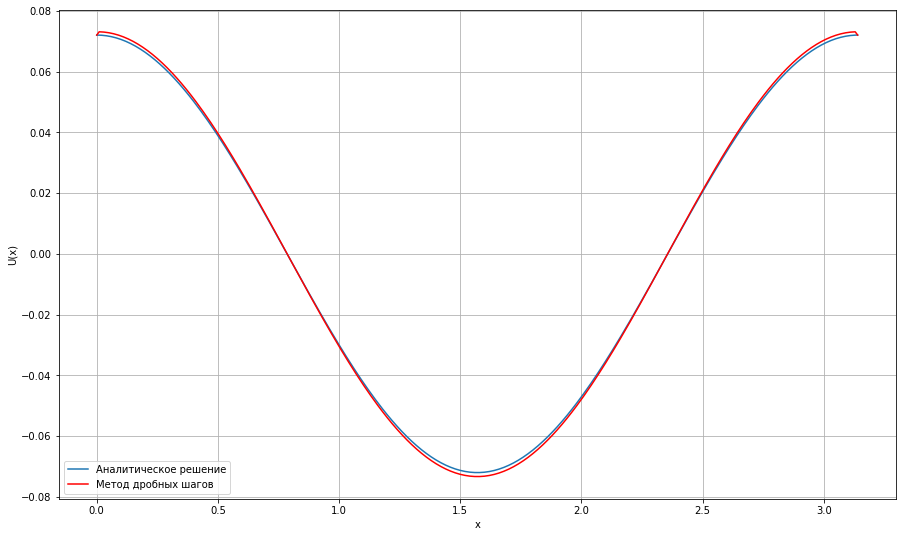

In [32]:
build_numerical_results_graphic(fractional_steps_solution, "Метод дробных шагов", 0.5, 0.5, x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau)

### Визуализация погрешности метода дробных шагов

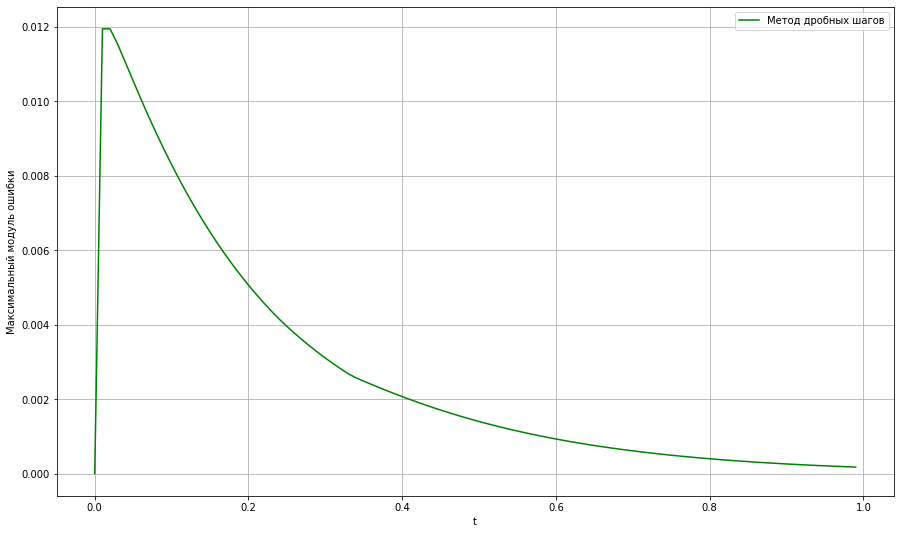

In [33]:
build_errors_graphic(fractional_steps_solution, "Метод дробных шагов", t_start, t_end, tau)

К достоинствам схемы МДШ можно отнести простоту в алгоритмизации и программировании и абсолютную устойчивость. К недостаткам МДШ относятся частичная аппроксимация на каждом дробном шаге и полная аппроксимация на последнем дробном шаге.

### Сравнение численных методов с аналитическим решением

In [37]:
def build_all_numerical_results_graphic(sol1, sol2, m_n1, m_n2, time, coord_y, x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau):
    x = np.arange(x_start, x_end, h_x)
    y = np.arange(y_start, y_end, h_y)
    t = np.arange(t_start, t_end, tau)
    cur_y_id = abs(y - coord_y).argmin()
    cur_t_id = abs(t - time).argmin()
    
    plt.figure(figsize=(15, 9))
    plt.plot(x, anal_solution[cur_t_id][:, cur_y_id], label='Аналитическое решение')
    plt.plot(x, sol1[cur_t_id][:, cur_y_id], label=m_n1, color='r')
    plt.plot(x, sol2[cur_t_id][:, cur_y_id], label=m_n2)
    
    plt.xlabel('x')
    plt.ylabel('U(x)')
    plt.legend()
    plt.grid()
    plt.show()

In [40]:
def build_all_errors_graphic(sol1, sol2, m_n1, m_n2, t_start, t_end, tau):
    t = np.arange(t_start, t_end, tau)

    plt.figure(figsize=(15, 9))
    max_abs_errors1 = np.array([max_abs_error(sol1[i], anal_solution[i]) for i in range(len(t))])
    max_abs_errors2 = np.array([max_abs_error(sol2[i], anal_solution[i]) for i in range(len(t))])
    plt.plot(t, max_abs_errors1, label=m_n1, color='g')
    plt.plot(t, max_abs_errors2, label=m_n2, color='m')

    plt.xlabel('t')
    plt.ylabel('Максимальный модуль ошибки')

    plt.legend()
    plt.grid()
    plt.show()

### Визуализация результатов работы численных методов

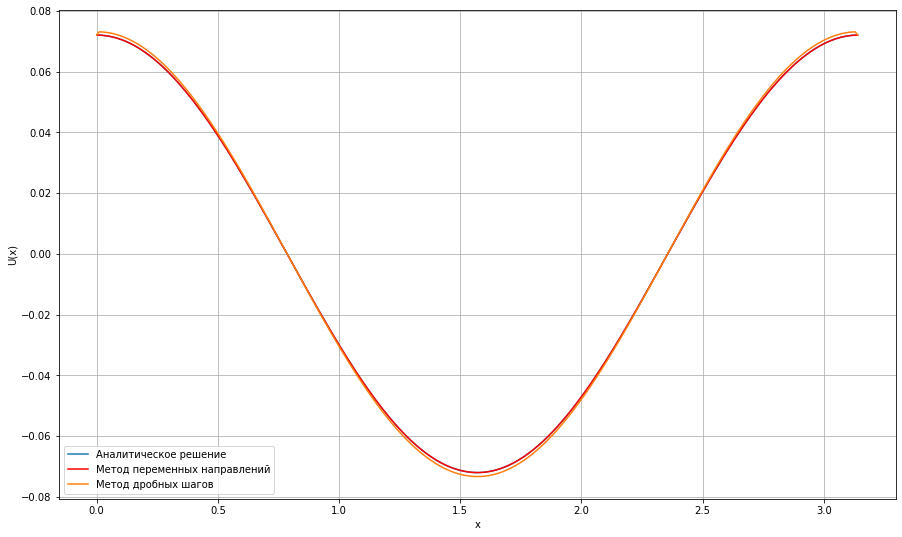

In [41]:
build_all_numerical_results_graphic(variable_directions_solution, fractional_steps_solution, "Метод переменных направлений", "Метод дробных шагов", 0.5, 0.5, x_start, x_end, y_start, y_end, t_start, t_end, h_x, h_y, tau)

### Визуализация зависимости погрешности от времени для численных методов

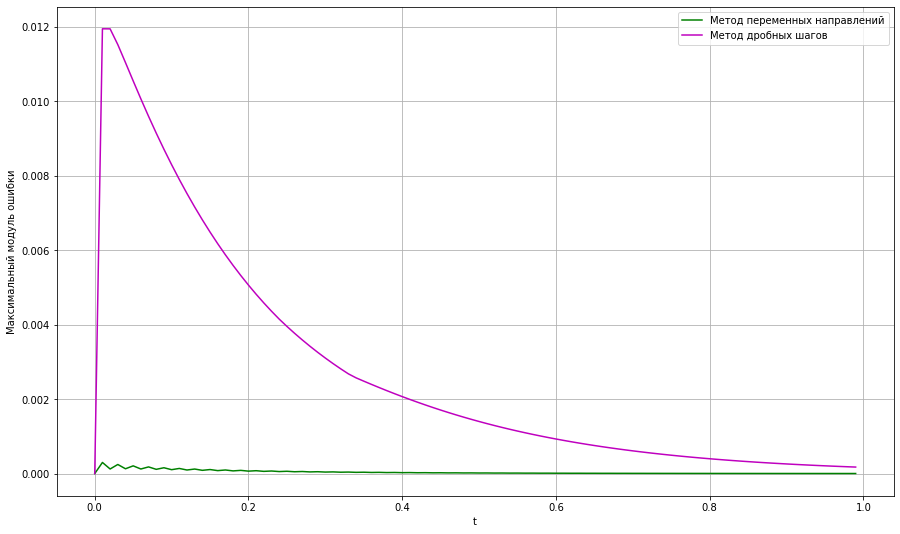

In [42]:
build_all_errors_graphic(variable_directions_solution, fractional_steps_solution, "Метод переменных направлений", "Метод дробных шагов", t_start, t_end, tau)

In [43]:
print(f'Максимальный модуль ошибки для метода переменных направлений = {max_abs_error(variable_directions_solution, anal_solution)}')
print(f'Максимальный модуль ошибки для метода дробных шагов = {max_abs_error(fractional_steps_solution, anal_solution)}')

Максимальный модуль ошибки для метода переменных направлений = 0.0002980949702586777
Максимальный модуль ошибки для метода дробных шагов = 0.01194071163538346


### Вывод

В ходе данной лабораторной работы изучил два метода для решения двумерных начально-краевых задач параболического типа:
- метод переменных направлений
- метод дробных шагов

Выяснил преимущества и недостатки каждого метода.  
Из общего графика зависимости погрешности численного метода от времени можно сделать вывод, что с помощью метода переменных направлений получили более точное решение, чем с помощью метода дробных шагов.